### One vs rest 

It's based on the following example. Let's say I have squares, triangles, and circles. It will classify the data going through it and asking at first, what is it? It finds a triangle, then, if it's not a triangle, it's something else. It finds a square, now, it will ask, if it's not a square or triangle, it has to be something else, and so on. 

### Multinomial Logistic Classifier

Unlike binary logistic regression, where you use a sigmoid function to predict the probability of one category, multinomial logistic regression uses the softmax function. Softmax assigns probabilities to each category such that the sum of the probabilities for all categories equals one. This ensures that the predicted probabilities represent a valid probability distribution

In [63]:
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [64]:
df = pd.read_csv('./data/Dry_Bean.csv')
df.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [65]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

### Drop Duplicates

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [68]:
sns.countplot(x='Class', data=df)
plt.xticks(rotation=45)
plt.show()

In [69]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

In [70]:
X = df.drop('Class', axis=1)
y = df.Class

In [71]:
X_over, y_over = undersample.fit_resample(X, y)

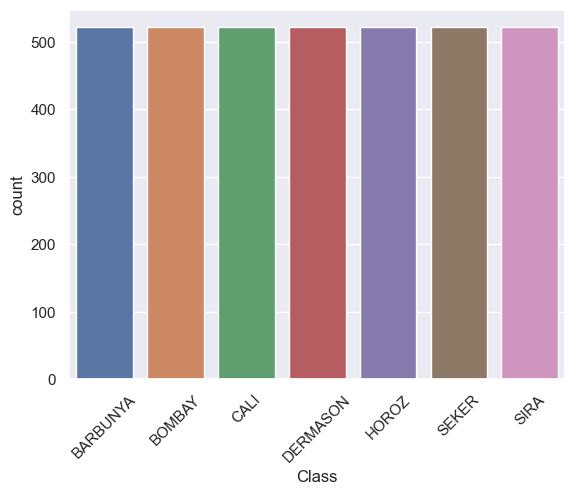

In [72]:
sns.countplot(x=y_over, data=df)
plt.xticks(rotation=45)
plt.show()

In [73]:
# This is the shape of our dataset before balancing
df.shape

(13543, 17)

In [74]:
# Shape of dataset after balance
X_over.shape

(3654, 16)

### Numerical conversion

In [75]:
import numpy as np

list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [76]:
y_over.replace(list(np.unique(y_over)), [1, 2, 3, 4, 5, 6, 7], inplace=True)

### Exploratory Analysis

#### Correlations

In [77]:
df_dea = X_over
df_dea['Class'] = y_over

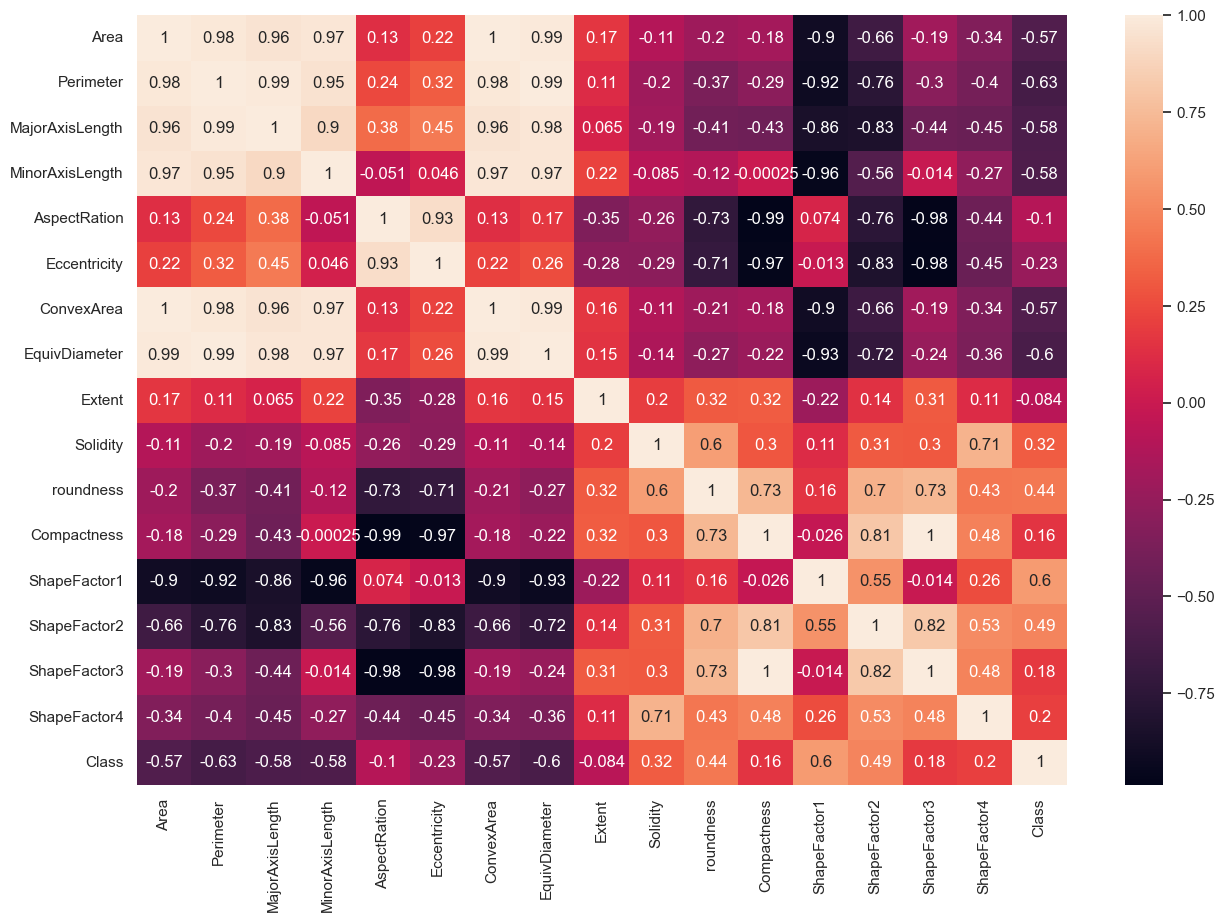

In [78]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

In [79]:
# This columns may create an overfitted model
X_over.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

### Data viz

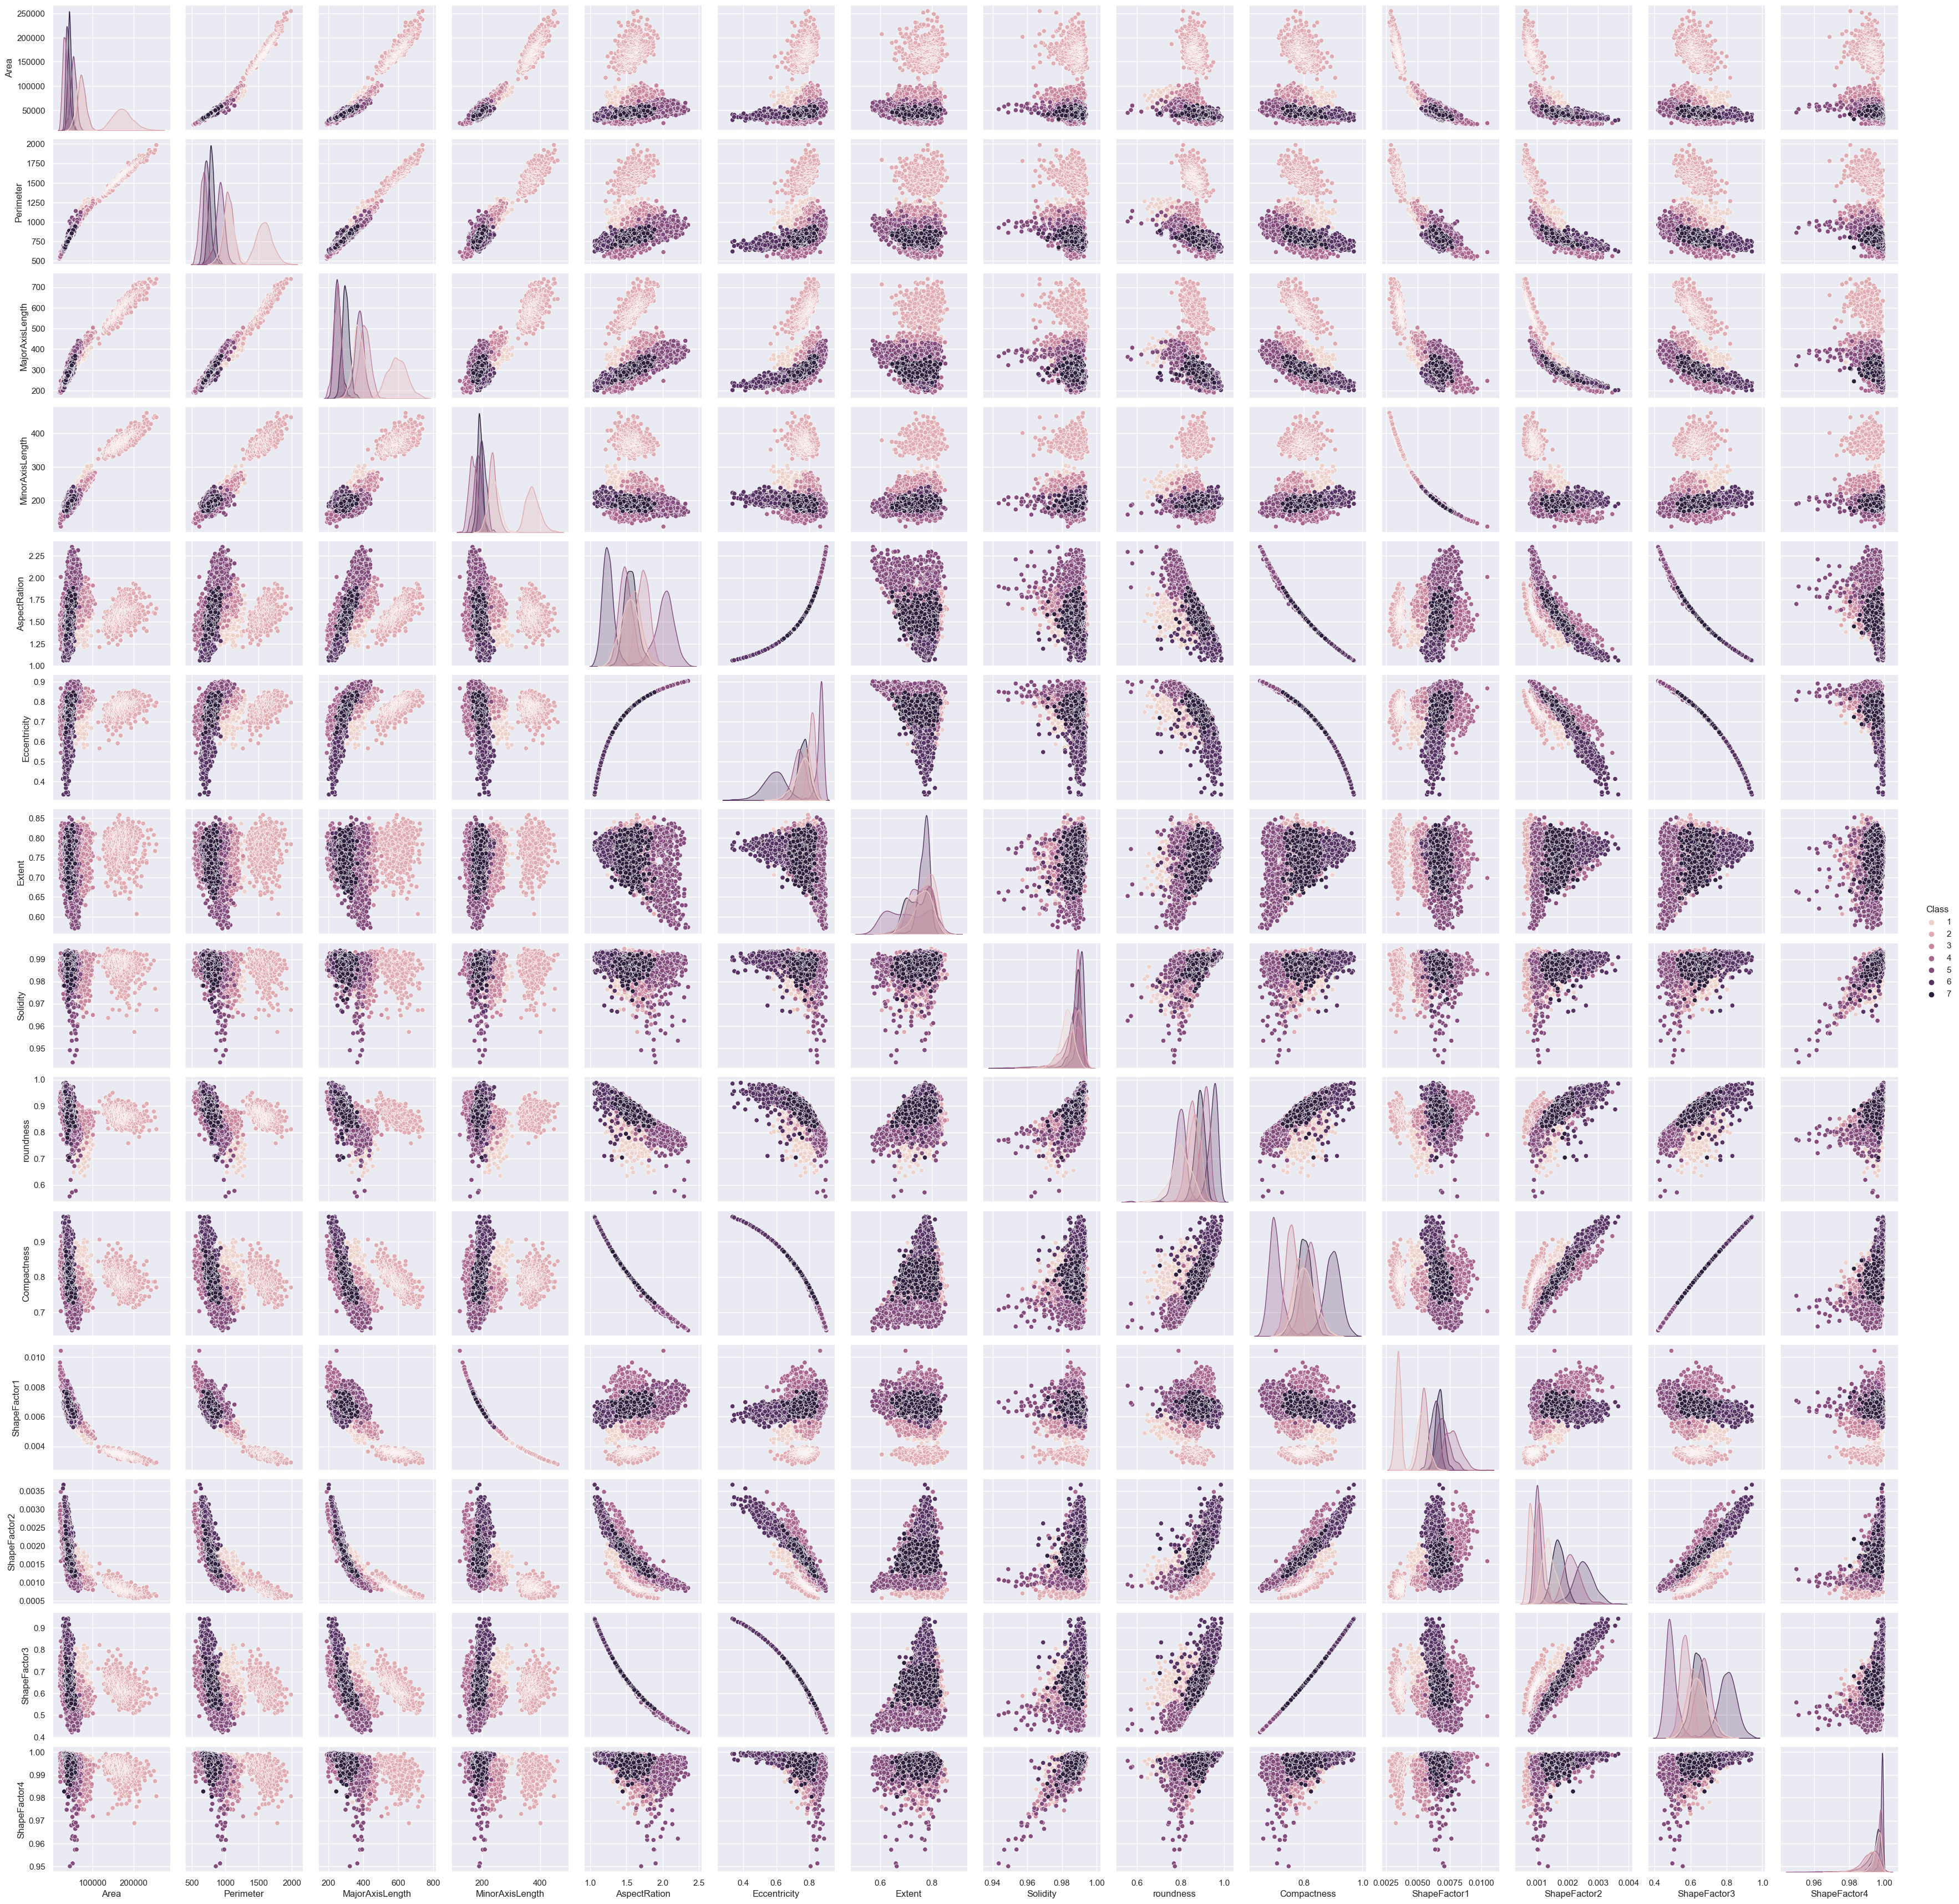

In [80]:
# How spread is the data
sns.pairplot(df_dea, hue='Class')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size=.2)    

In [85]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

### Multiclass Model

In [86]:
def logistic_model(C, solver_, multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver=solver_, multi_class=multiclass_, n_jobs=1, C=C)
    return logistic_regression_model

In [88]:
model = logistic_model(1, 'saga', 'multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [89]:
multiclass = ['ovr', 'multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params = []

for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1, j, i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + ' ' + j)
            accuracy = accuracy_score(y_test, predictions)
            scores.append(accuracy)
        except:
            None

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ovr liblinear'),
  Text(1, 0, 'ovr newton-cg'),
  Text(2, 0, 'ovr lbfgs'),
  Text(3, 0, 'ovr sag'),
  Text(4, 0, 'ovr saga'),
  Text(5, 0, 'multinomial newton-cg'),
  Text(6, 0, 'multinomial lbfgs'),
  Text(7, 0, 'multinomial sag'),
  Text(8, 0, 'multinomial saga')])

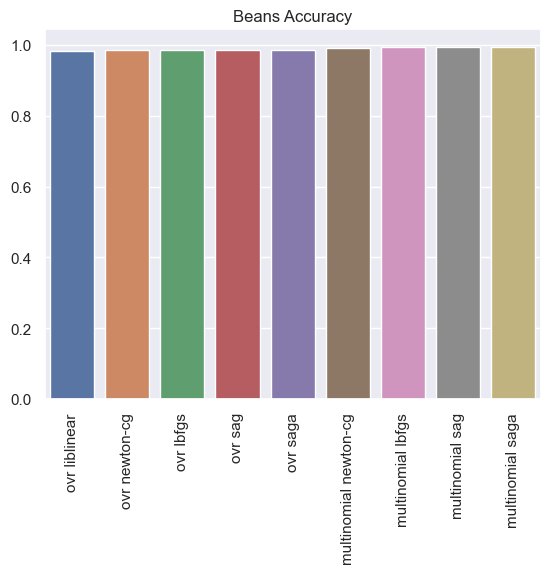

In [93]:
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)

In [94]:
model = logistic_model(1, 'newton-cg', 'multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


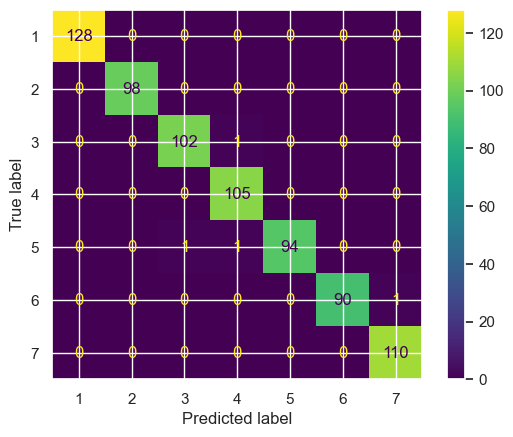

In [95]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()